# Applying Machine Learning to Neutron Star Research

## An extension of my Graduate Thesis Research on 'The Heating and Cooling of Neutron Stars', Texas A&M University Commerce

Here I am attempting to use ML techniques I learned from skillshare [https://www.skillshare.com/classes/Data-Science-and-Machine-Learning-with-Python-Hands-On/1263657127/projects] to my research on neutron stars.

Neutron stars are one of the possibilities of the death of a massive star. The star can explode by supernova and leave a rapidly-spinning core of the star behind. These objects are about the size of a city (9-14km in radius) but contain the mass comparable to that of the sun! Because they are so small, relatively far away from Earth and such dense objects, measuring the true mass and size of a NS is difficult. My main goal is to try and predict possible masses given a spin period and magnetic field (Bfields) of a neutron star (NS) (or other parameters). I may have a hard time since the masses of most NSs are unknown/uncertain. However, I can still try to show the distribution of Bfields and periods of NSs in a better way and predict one parameter using the relationship with the other. 

I may try to use sample data from what NSs we do have the masses of and use ML on that. 

### Order of Operations
1. Collect data 
    - NS masses (hard to collect because they are unknown, all approximated)
    - Bfields: Australian Telescope National Facility (ATNF) pulsar catalog
    - periods(initial periods before spin down): ATNF pulsar catalog
2. Clean data. Most of the data I have is already somewhat sorted back from when I was doing research (dropna's, sort by Bfield ascending). However if I decide to add more parameters or redo the cleaning or add masses to it, I will have to clean it.
3. Join masses with Bfields and period data (if able to do so). join on names? not sure yet
4. Plot relationships on seaborn initially to find correlations, practice plotting mostly
5. Use ML techiques on distributions. Apply train-test to each as necessary
    - KNN
    - Decision Trees/RF
    - SVM/SVC
    - K-Cross validation
6. Try to plot results (this may be tough since I struggled in the course to plot things a) do to path errors and python not having visualization modules b) not knowing how to code it)

# 1. Collecting the Data

First, to collect the data and import it using pandas:

In [2]:
import pandas as pd

bvp = pd.read_csv('ATNFBvPextra.csv', names=['period', 'bsurf'], skiprows=1) #gets rid of header row from excel csv file
bvp.head()

,period,bsurf
0,0.693748,1.220000e+12
1,0.002634,4.500000e+07
2,0.003463,4.550000e+07
3,0.002978,6.800000e+07
4,0.002678,6.970000e+07


# 2. Cleaning the Data

As mentioned above, most of the data is clean of null values and sorted. Just need to convert values to log and make sure it all makes sense.

In [4]:
bvp.describe()
#just to get the analytics and make sure the count is the same

,period,bsurf
count,2072.000000,2.072000e+03
mean,0.773188,2.416620e+12
std,0.883161,9.516991e+12
min,0.001558,4.500000e+07
25%,0.269436,3.017500e+11
50%,0.529319,9.755000e+11
75%,0.962636,2.220000e+12
max,8.509827,2.600000e+14


In [3]:
#converting period and bsurf to log of values for consistency and clarity
import numpy as np
logbvp = bvp.apply(lambda x: np.log10(x))
logbvp.head()


,period,bsurf
0,-0.158798,12.086360
1,-2.579362,7.653213
2,-2.460535,7.658011
3,-2.526102,7.832509
4,-2.572202,7.843233


## 4. Plotting Period and Bsurf (the better way!)

I have already created plots for these in my research, but now I want to improve those plots and make them more visually appealing and maybe show more analytics from them.

Skipping step 3, may do it at a later time.

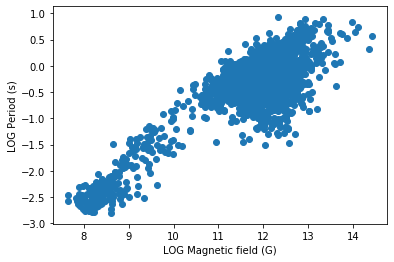

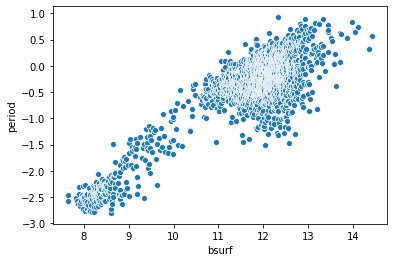

In [4]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

p = logbvp.period #the raw data
b = logbvp.bsurf
#original plots using matplotlib
plt.scatter(b, p)
plt.xlabel('LOG Magnetic field (G)')
plt.ylabel('LOG Period (s)')
plt.show()
#new plots using seaborn
figure = plt.figure()
sns.scatterplot(x=b, y=p, data=logbvp)


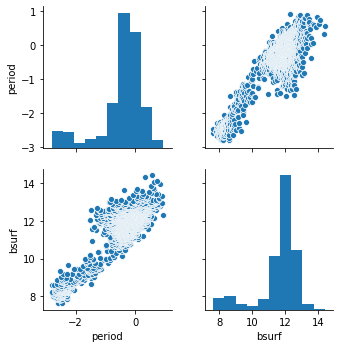

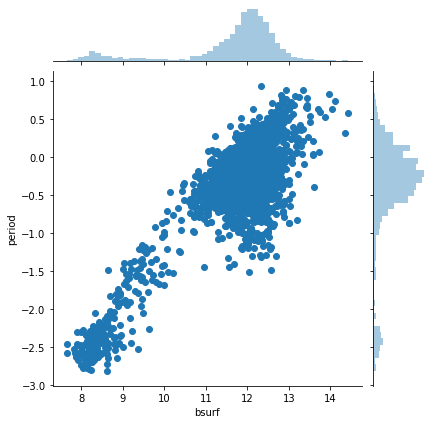

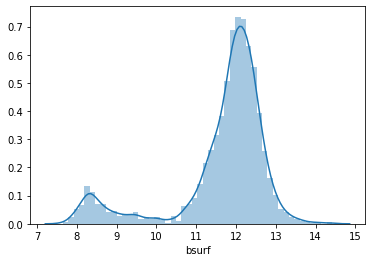

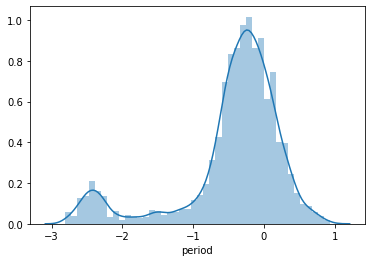

In [7]:
#using seaborn to create more plots
sns.pairplot(logbvp)
sns.jointplot(x=b, y=p, data=logbvp) #actually used this for my research
figure = plt.figure()
sns.distplot(b)
fig = plt.figure()
sns.distplot(p)
#great way to show distribution based on the two parameters

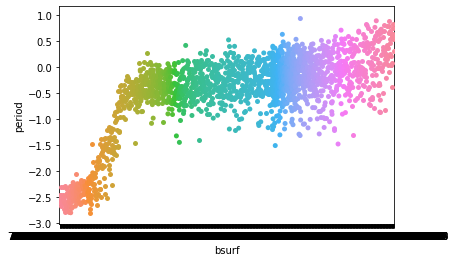

In [8]:
sns.swarmplot(x=b, y=p, data=logbvp)
#this one is a colorful graph showing the distribution in clusters by color and

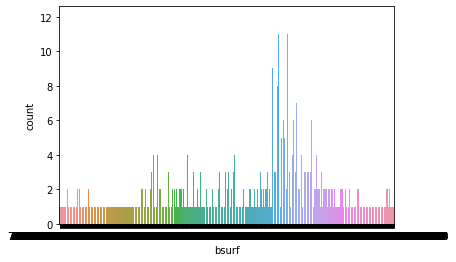

In [9]:
sns.countplot(x=b, data=logbvp)
#this one is a pretty graph showing the counts of NSs with certain bfields

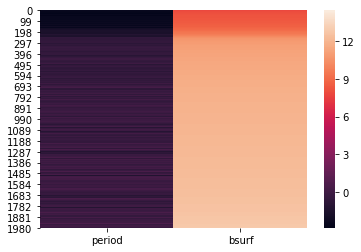

In [10]:
sns.heatmap(logbvp)
#this doesn't seem very helpful

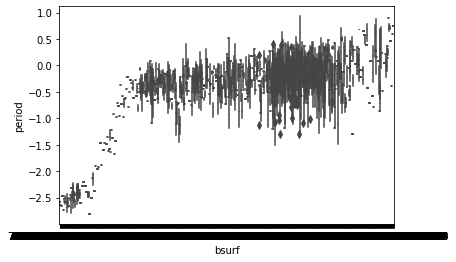

In [11]:
sns.boxplot(x=b, y=p, data=logbvp)
#also not helpful but wanted to see what kind of graph would be produced

### Discussion

It is shown through mathematical equations and physics that the magnetic field is directly correlated with the period (as period increases, bfield increases). These graphs also depict this relationship. Later I will prove correlation using ML techniques (linear regression, correlation and covariance). Based on popultion distribution, most NSs have a period between -1.0 and 0.5 (~0.1-3 s) and a magnetic field between 10 and 13 ($10^{10}$-$10^{13}$ G). There are a significant amount, however, that have lower Bfields ($10^8-10^9$ G) and faster periods (0.01-0.001 s) (millisecond pulsars).

Using this distribution in my research, I compared to other parameters and used Fortran to predict a distribution of theoretically-produced random NSs. In my research I studied two NSs in particular and compared other parameters such as accretion rate (for heating of one), atmospheric composition (for cooling of the other), equation of state (EOS) and other parameters to these to study the thermal evolution of NSs.

## 5. Applying Machine Learning to BvP plots

Now I am going to apply ML techniques I learned to the BvP plots to see correlation and other relationships. Since there are many other parameters that attribute to these ones, the results may not be super good or super accurate. First I have to normalize the data so they are on some standard scale.

In [12]:
#converting to numpy arrays
bsurf = np.array(logbvp['bsurf'])
period = np.array(logbvp['period'])
print(bsurf[:5])
print(period[:5])

[12.08635983  7.65321251  7.6580114   7.83250891  7.84323278]
[-0.15879846 -2.57936197 -2.46053509 -2.5261017  -2.57220191]


In [13]:
#linear regression
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(bsurf, period)
r_value**2 #shows how good the model is on a scale from 0 to 1

0.7627125740464752

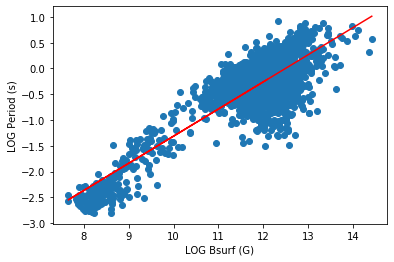

y = 0.5268928147125491x + -6.58145930063908


In [14]:
def predict(x):
    y = slope*x +intercept
    return y
fitline = predict(bsurf)
plt.scatter(bsurf, period)
plt.plot(bsurf, fitline, c='r')
plt.xlabel('LOG Bsurf (G)')
plt.ylabel('LOG Period (s)')
regressionline = 'y = '+str(slope)+'x + '+str(intercept)
plt.show()
print(regressionline)

In [15]:
#Information on the model thats scaled
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

B = pd.DataFrame(b)

B = scale.fit_transform(B) #scaling in relation to bsurf, using that as independent variable even though it may not be in reality
print(B)

est = sm.OLS(p, B).fit()
est.summary()

[[ 0.35960913]
 [-3.30069282]
 [-3.29673054]
 ...
 [ 2.0253453 ]
 [ 2.22561013]
 [ 2.28226768]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 period   R-squared (uncentered):                   0.558
Model:                            OLS   Adj. R-squared (uncentered):              0.558
Method:                 Least Squares   F-statistic:                              2613.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                        0.00
Time:                        13:00:55   Log-Likelihood:                         -1768.3
No. Observations:                2072   AIC:                                      3539.
Df Residuals:                    2071   BIC:                                      3544.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6381      0.012     51.122      0.000       0.614       0.663
==============================================================================
Omnibus:                      109.490   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.000
Skew:                          -0.551   Prob(JB):                     5.90e-29
Kurtosis:                       3.538   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

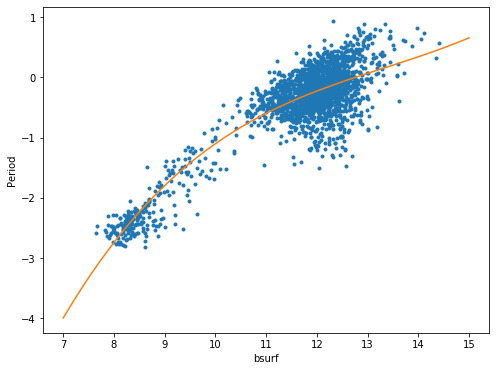

In [35]:
#Polynomial regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression() #another way to plot linear regression, not needed for this plot

#create function to plot polynomial regression line
def PlotPoly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(7, 15, 100) #make sure it makes sense with whatever x data scale is used
    y_new = model(x_new)

    plt.figure(figsize=(8,6))
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.xlabel(Name)
    plt.ylabel('Period') #change according to dependent variable in question
    plt.show()
#use numpy to fit polynomial and get regression line equation
poly = np.polyfit(b, p, deg=3) #use dataframe elements, not numpy arrays. Can adjust degree of polynomial
poly1d = np.poly1d(poly)
#plot polynomial
PlotPoly(poly1d, b, p, 'bsurf')

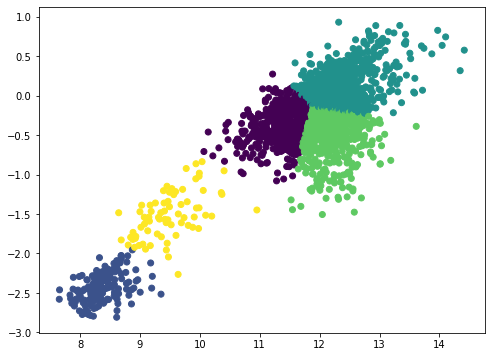

In [46]:
#KMeans : This could be useful if used optimally
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

model = KMeans(n_clusters=5)
model = model.fit(scale(logbvp))

plt.figure(figsize=(8, 6))
plt.scatter(b, p, c=model.labels_.astype(float))
plt.show()


In [45]:
#now to implement k-fold cross validation
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import preprocessing, utils

b_rs = np.array(b)
b_rs = b_rs.reshape(-1,1)
p_rs = np.array(p)
p_rs = p_rs.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(b_rs, p_rs, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
#clf.score(X_test, y_test)  

lab_enc = preprocessing.LabelEncoder()
training_enc_x = lab_enc.fit_transform(X_train)
training_enc_y = lab_enc.fit_transform(y_train)
test_enc_x = lab_enc.fit_transform(X_test)
test_enc_y = lab_enc.fit_transform(y_test)
#print(training_scores_encoded)
#print(utils.multiclass.type_of_target(X_train))
#print(utils.multiclass.type_of_target(X_train.astype('int')))
#print(utils.multiclass.type_of_target(training_scores_encoded))
training_enc_x = training_enc_x.reshape(-1,1)
test_enc_x = test_enc_x.reshape(-1,1)
clf = svm.SVC(kernel='linear', C=1).fit(training_enc_x, training_enc_y)
print(clf.score(test_enc_x, test_enc_y))
#low score probably due to incorrect scaling and encoding and etc...

C:\Users\bdoug\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0036188178528347406


In [ ]:
#for kfold cross val
scores = cross_val_score(clf, b_rs, p_rs, cv=5)
#FAIL, on to another technique...

## Discussion

It seems I can only do so much with my limited amount of data and attributes. If I had another attribute at least, such as the masses, I could maybe be able to use more complex ML techniques such as decision tress, KNN and cross validation. I think for cross validation I need to have attributes as my X and my target as the y for it to work properly, instead of trying to infuse the two. I keep getting continous and reshaping array errors otherwise... 

However, I am pleased that I was able to create visualizations for some things, and I will try to figure out a way to incorporate the masses at some point!

# Incorporating Equation of State (EOS)

As aforementioned, there are many different factors that go into determining the mass of a neutron star. The magnetic field and the period of the star is just an example. My old advisor gave me a huge data set, 670 rows and 58 columns, on different parameters use in the Equation of State to determine the mass and density of a NS. The Equation of state shows the relationship between pressure and density, based on the volume and temperature (think of the equation PV = NkT). This is important to know for a NS because if the volume and the density is well known, being able to produce a mass is feasible. However since NS are known for being extremely dense objects (one teaspoon of NS is comparable to the weight of Mt. Everest!) and surpass the nuclear saturation density (the density of regular nuclei on Earth), it is not well known how to deal with these super densities and the only way to observe such high densities is through objects such as NSs. I don't want to go into to much detail, but know that factors such as nuclear properties and neutrons in particular are important factors in determining the EOS, and the EOS is important for determining the mass. (for more information, please check out my thesis https://dmc.tamuc.edu/digital/collection/p15778coll7/id/1057/)

### Information about the new table:

These are different EOS models called Skryme forces that describe different EOSs.

- The first 28 are the symmetry energy parameters J, L, Ksym and Qsym at saturation density (first 4 rows), then at 0.06 fm^-3 (next 4 rows), 0.07fm^-3 (next 4 rows) and so on up to 0.11 fm^-3.

- Then the next 2 (columns 29-30) are the crust-core transition densities estimated using two different approximations. The next 2 are the crust-core transition pressures and the next 2 the crust-core transition chemical potentials. 

- Then the next 4 (35-38) are the proton radius, neutron radius, binding energy and neutron skin of Calcium 48. 
- Then the next 4 (39-42) are the proton radius, neutron radius, binding energy and neutron skin of Tin 112, the next 4 are the same for Tin 132, and the next for for Lead 208. 

- The next 6 (51-56) are the transition density, pressure and chemical potential, and then the same for pasta for the liquid drop model. The final two columns are unknown at the moment, but we will hopefully try to refigure out what they mean.

In [21]:
#importing the new csv file. There is one column name unaccounted for so there are 3 unknown columns at the end
cols = ['J','L','Ksym','Qsym','0.06J','0.06L','0.06Ksym','0.06Qsym','0.07J','0.07L','0.07Ksym','0.07Qsym',
        '0.08J','0.08L','0.08Ksym','0.08Qsym','0.09J','0.09L','0.09Ksym','0.09Qsym','0.10J','0.10L','0.10Ksym','0.10Qsym',
        '0.11J','0.11L','0.11Ksym','0.11Qsym','dcrust_core_trans_a','dcrust_core_trans_b','pcrust_core_trans_a','pcrust_core_trans_b',
        'mu_crust_core_trans_a','mu_crust_core_trans_b','p_radius_Ca48','n_radius_Ca48','Binding_E_Ca48','neutron_skin_Ca48',
        'p_radius_Tn112','n_radius_Tn112','Binding_E_Tn112','neutron_skin_Tn112','p_radius_Tn132','n_radius_Tn132','Binding_E_Tn132','neutron_skin_Tn132',
        'p_radius_Pb208','n_radius_Pb208','Binding_E_Pb208','neutron_skin_Pb208','pasta_trans_d','pasta_trans_pressure','pasta_trans_mu',
        'pasta_LDM_d','pasta_LDM_pressure','pasta_LDM_mu','UnknownA','UnknownB']
eos = pd.read_table('mega_table_ultimate_Ext.txt', sep='\t', header=None, names=cols)
eos.head()


,J,L,Ksym,Qsym,0.06J,0.06L,0.06Ksym,0.06Qsym,0.07J,0.07L,...,Binding_E_Pb208,neutron_skin_Pb208,pasta_trans_d,pasta_trans_pressure,pasta_trans_mu,pasta_LDM_d,pasta_LDM_pressure,pasta_LDM_mu,UnknownA,UnknownB
0,25.0,0.4,-306.4,472.718994,17.4830,30.7644,-78.9695,154.387497,19.0709,31.0260,...,-935.6152,0.0272,0.082025,0.196772,9.794894,0.055132,0.141265,8.941764,32.498658,32.354728
1,25.0,-0.7,-296.6,538.313416,17.7832,30.4226,-81.8424,172.713104,19.3482,30.4717,...,-935.4697,0.0254,0.082374,0.181942,9.725609,0.050941,0.127106,8.838568,32.464627,32.308861
2,25.0,10.0,-243.1,495.517090,16.8000,29.7576,-71.1247,160.756805,18.3443,30.3694,...,-935.9488,0.0295,0.121490,0.356851,11.023564,0.054434,0.130065,8.369832,32.757182,32.318855
3,25.0,10.6,-162.2,804.690674,17.7588,27.6321,-79.5414,247.132706,19.1747,27.4882,...,-935.4823,0.0227,0.117997,0.211705,9.961272,0.039067,0.089109,8.147442,32.530425,32.154617
4,25.0,10.8,-192.4,679.101379,17.3343,28.4561,-75.7294,212.046005,18.8008,28.6380,...,-935.6849,0.0254,0.117997,0.265445,10.324698,0.044655,0.101267,8.184451,32.628668,32.210162


## Data Exploration

In [30]:
#All columns are numeric, and none of them have missing values, which is great!
eos.describe()

,J,L,Ksym,Qsym,0.06J,0.06L,0.06Ksym,0.06Qsym,0.07J,0.07L,...,Binding_E_Pb208,neutron_skin_Pb208,pasta_trans_d,pasta_trans_pressure,pasta_trans_mu,pasta_LDM_d,pasta_LDM_pressure,pasta_LDM_mu,UnknownA,UnknownB
count,670.000000,670.000000,670.00000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,...,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,31.028358,45.825224,-136.08791,497.801666,17.724729,35.113473,-55.474990,161.395035,19.589970,37.628456,...,-931.677281,0.064704,0.094458,0.490725,14.435690,0.054057,0.198672,10.445115,32.876714,32.482589
std,3.446447,23.706980,97.54972,145.069382,0.578895,3.745469,13.575556,40.529021,0.715322,4.953935,...,2.165061,0.020761,0.014196,0.137961,2.412424,0.004098,0.057633,1.377248,0.132036,0.137187
min,25.000000,-1.900000,-360.10000,175.144394,16.380500,26.699900,-84.861800,71.252098,17.767400,27.344700,...,-936.163700,0.021800,0.072595,0.166797,8.813651,0.039067,0.073108,7.011325,32.426883,32.068659
25%,27.800000,26.225000,-208.65000,381.126846,17.277875,32.296950,-66.394825,128.798828,19.068350,33.609975,...,-933.355650,0.047700,0.083771,0.390948,12.650677,0.052338,0.156223,9.455592,32.796813,32.398440
50%,30.600000,45.300000,-140.80000,501.716553,17.712050,35.299600,-55.742950,162.488801,19.582800,37.807200,...,-931.466050,0.066100,0.091105,0.485608,14.453377,0.054434,0.198995,10.435883,32.890980,32.503537
75%,33.400000,64.875000,-67.82500,613.307037,18.161250,37.993700,-45.030300,193.664524,20.110950,41.527825,...,-929.827000,0.082575,0.101932,0.592962,16.188226,0.056529,0.240654,11.448501,32.977721,32.586087
max,36.200000,100.600000,118.90000,814.689819,19.115000,43.018400,-22.944000,249.926193,21.423900,47.041400,...,-927.961800,0.099300,0.138952,0.833637,20.649513,0.062117,0.329073,13.893926,33.125672,32.721987


J        31.028358
0.06J    17.724729
0.07J    19.589970
0.08J    21.311451
0.09J    22.903766
0.10J    24.381578
0.11J    25.756815
dtype: float64


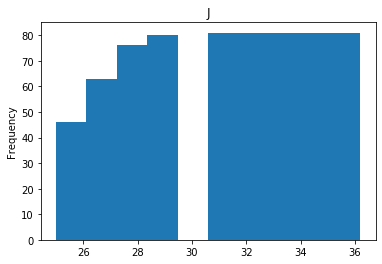

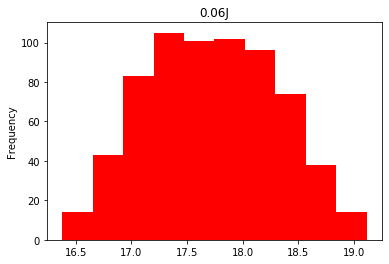

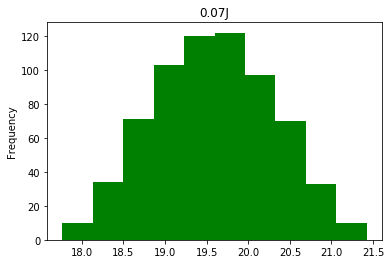

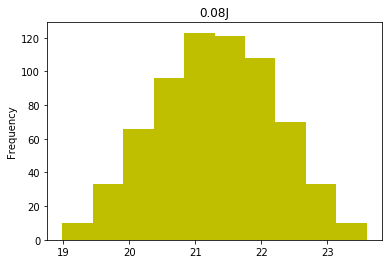

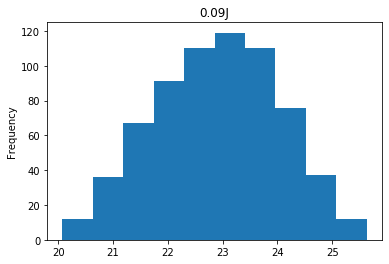

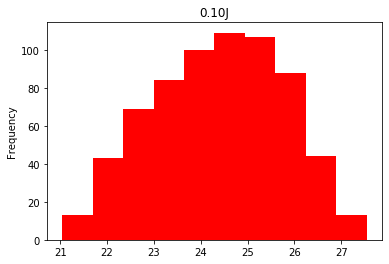

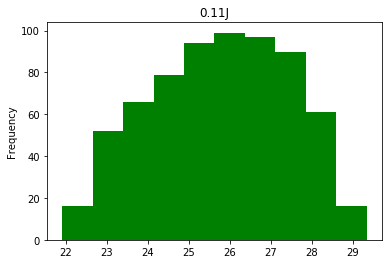

In [33]:
#plot different variations of the J column to see distributions and averages
eos['J'].plot.hist()
plt.title('J')
plt.figure()
eos['0.06J'].plot.hist(color='r')
plt.title('0.06J')
plt.figure()
eos['0.07J'].plot.hist(color='g')
plt.title('0.07J')
plt.figure()
eos['0.08J'].plot.hist(color='y')
plt.title('0.08J')
plt.figure()
eos['0.09J'].plot.hist()
plt.title('0.09J')
plt.figure()
eos['0.10J'].plot.hist(color='r')
plt.title('0.10J')
plt.figure()
eos['0.11J'].plot.hist(color='g')
plt.title('0.11J')

J_means = eos[['J','0.06J','0.07J','0.08J','0.09J','0.10J','0.11J']].mean()
print(J_means)

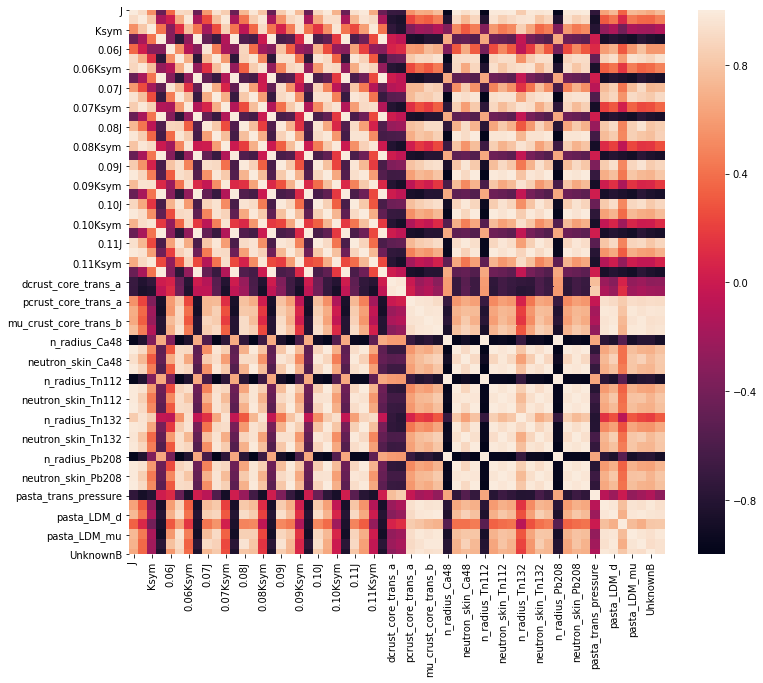

In [37]:
#visualize the correlations between each variable 
#Really light tan colors and dark reddish-black colors indicate high correlations
correlations = eos.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlations)

Since alot of the data is similar, there is some multicollinearity. The high correlations may indicate this collinearity, which could lead to skewed results that overfit a model, so it is something to be aware of.

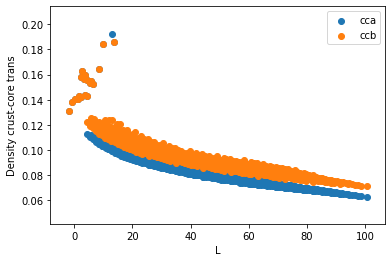

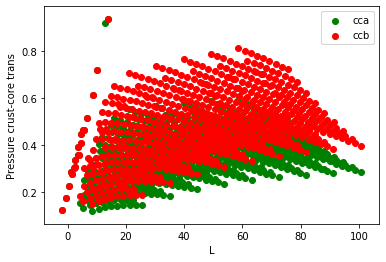

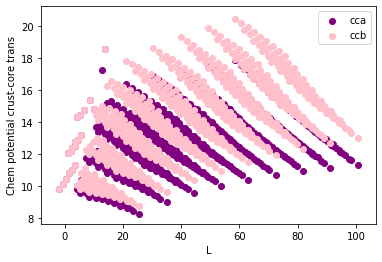

In [29]:
#Comparing a and b on crust-core transitions densities, pressures, and chemical potentials
plt.figure()
plt.scatter(eos["L"], eos["dcrust_core_trans_a"])
plt.scatter(eos["L"], eos["dcrust_core_trans_b"])
plt.xlabel("L")
plt.ylabel("Density crust-core trans")
plt.legend(["cca","ccb"])

plt.figure()
plt.scatter(eos["L"], eos["pcrust_core_trans_a"], color='g')
plt.scatter(eos["L"], eos["pcrust_core_trans_b"], color='r')
plt.xlabel("L")
plt.ylabel("Pressure crust-core trans")
plt.legend(["cca","ccb"])

plt.figure()
plt.scatter(eos["L"], eos["mu_crust_core_trans_a"], color='purple')
plt.scatter(eos["L"], eos["mu_crust_core_trans_b"], color='pink')
plt.xlabel("L")
plt.ylabel("Chem potential crust-core trans")
plt.legend(["cca","ccb"])

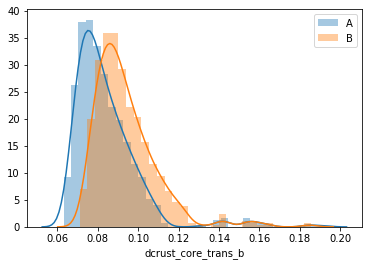

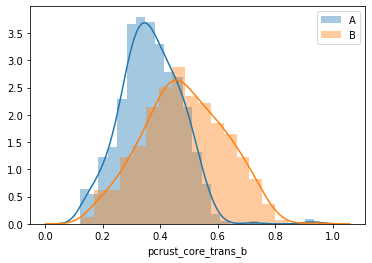

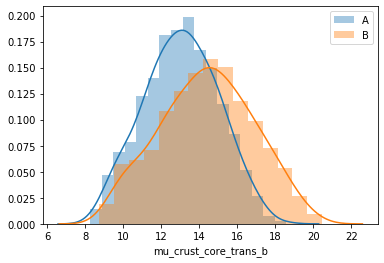

In [27]:
plt.figure()
sns.distplot(eos["dcrust_core_trans_a"])
sns.distplot(eos["dcrust_core_trans_b"])
plt.legend(["A","B"])

plt.figure()
sns.distplot(eos["pcrust_core_trans_a"])
sns.distplot(eos["pcrust_core_trans_b"])
plt.legend(["A","B"])

plt.figure()
sns.distplot(eos["mu_crust_core_trans_a"])
sns.distplot(eos["mu_crust_core_trans_b"])
plt.legend(["A","B"])

Based on the above graphs, A seems to always be higher than B. The density graph showed a linear relationship for the most part between L and the densities. However, on the other graphs with the chemical potential and pressure, there was no linear pattern but for the chemical potential there was some sort of pattern when compared to L. I chose L simply because I thought it would be easy to graph and compare to, no real particular reason.

## Target Data?

As far as the target of what we would want to predict with this dataset, it is hard to tell. We could put the different J, L, Ksym and other parameters into particular theorized EOS models called Skyrme models, and see which performs the best. However, I am unsure how to model a model into machine learning. The Skyrme equations themselves would be like the ML model and then testing to see which performs best... I would have to discuss with my advisor or do more research on Skyrme equations to see what would be the best case scenario with each column in the given data set.